# Algorithm Training and Model Development

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set() # revert to matplotlib defaults
plt.rcParams['figure.figsize']= (16, 12)

In [2]:
# load clean dataset
cleaned_df = pd.read_csv('../dataset/Solcast_leon_20_21_clean.csv')
cleaned_df.head()


,Unnamed: 0,MonthPE,Date,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,2019-12-31,12,2019-12-31,7.71,3.88,39.5,928.02,126.4,0.71,631.7,234.8,37.7
1,2020-01-01,1,2020-01-01,6.05,4.19,57.5,927.81,155.9,0.65,626.8,234.5,40.8
2,2020-01-02,1,2020-01-02,5.01,6.66,63.7,925.93,133.0,0.89,309.3,191.5,101.5
3,2020-01-03,1,2020-01-03,5.03,10.04,73.2,928.38,94.7,0.68,131.3,155.5,109.1
4,2020-01-04,1,2020-01-04,4.79,5.74,70.3,930.70,124.0,0.97,35.4,121.6,117.3


In [3]:
# display column names
cleaned_df.columns

Index(['Unnamed: 0', 'MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip',
       'Daily_Humidity', 'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed',
       'Daily_DNI', 'Daily_GHI', 'Daily_radiation'],
      dtype='object')

In [4]:
# select features
cleaned_df= cleaned_df[['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity', 'Daily_Pressure',\
                        'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI', 'Daily_GHI', 'Daily_radiation']]

In [5]:
# feature engineering of time series column
cleaned_df['Date'] = pd.to_datetime(cleaned_df['Date'], format='%Y-%m-%d')
cleaned_df['year']= cleaned_df['Date'].dt.year
cleaned_df['month']= cleaned_df['Date'].dt.month
cleaned_df['day']= cleaned_df['Date'].dt.day

In [6]:
# display column names
cleaned_df.columns

Index(['MonthPE', 'Date', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_GHI', 'Daily_radiation', 'year', 'month', 'day'],
      dtype='object')

In [7]:
# select features
cleaned_df= cleaned_df[['month', 'day', 'Daily_Temp', 'Daily_Precip', 'Daily_Humidity',
       'Daily_Pressure', 'Daily_WindDir', 'Daily_WindSpeed', 'Daily_DNI',
       'Daily_GHI', 'Daily_radiation']]
cleaned_df.head()

,month,day,Daily_Temp,Daily_Precip,Daily_Humidity,Daily_Pressure,Daily_WindDir,Daily_WindSpeed,Daily_DNI,Daily_GHI,Daily_radiation
0,12,31,7.71,3.88,39.5,928.02,126.4,0.71,631.7,234.8,37.7
1,1,1,6.05,4.19,57.5,927.81,155.9,0.65,626.8,234.5,40.8
2,1,2,5.01,6.66,63.7,925.93,133.0,0.89,309.3,191.5,101.5
3,1,3,5.03,10.04,73.2,928.38,94.7,0.68,131.3,155.5,109.1
4,1,4,4.79,5.74,70.3,930.70,124.0,0.97,35.4,121.6,117.3


In [8]:
# select target feature
X = cleaned_df.drop(['Daily_radiation'], axis=1)
y = cleaned_df['Daily_radiation']

## Model Training and Testing

In [9]:
# import libraries for algorithms traininng, and metrics to judge performance
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

### Linear Regression

In [11]:
# setup the pipeline steps
steps = [('scaler', StandardScaler()), ('lr', LinearRegression())]

# create the pipeline
pipeline_lr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_lr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_lr = pipeline_lr.predict(X_test)

In [12]:
# evaluating algorithm performance
mse = mean_squared_error(y_test, y_pred_lr, squared=False)

mae = mean_absolute_error(y_test, y_pred_lr)

print('r2_score', r2_score(y_test, y_pred_lr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae))

r2_score 0.7860007544298153
Root Mean Squared Error: 5.03
Root Mean Absolute Error: 4.52


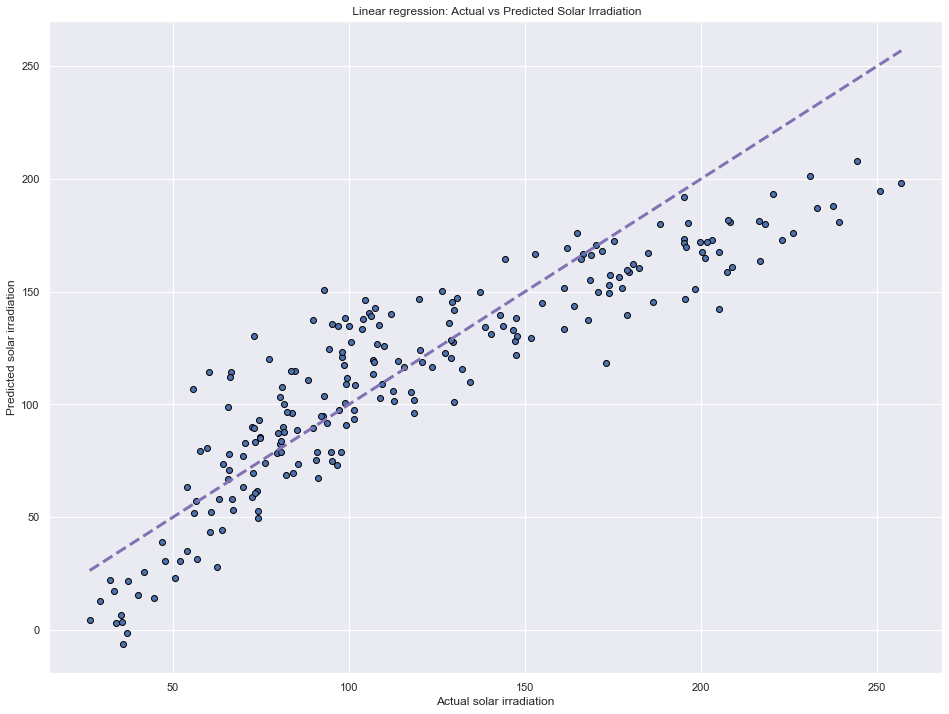

In [13]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_lr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Linear regression: Actual vs Predicted Solar Irradiation")
plt.show() 

C:\ProgramData\Anaconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


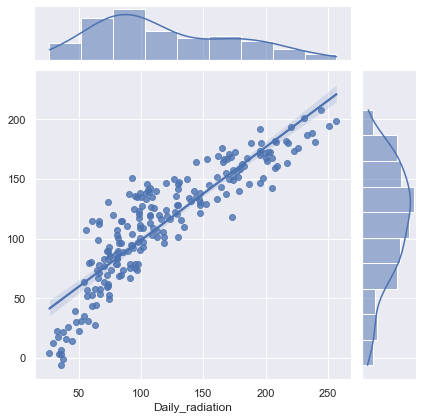

In [14]:
sns.jointplot(y_test, y_pred_lr, kind='reg')
plt.show()

### Random Forest Regressor

In [15]:
# setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('rfr', RandomForestRegressor())]

# create the pipeline: pipeline
pipeline_rfr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_rfr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_rfr = pipeline_rfr.predict(X_test)

In [16]:
# evaluating algorithm performance
mse_rf = mean_squared_error(y_test, y_pred_rfr, squared=False)

mae_rf = mean_absolute_error(y_test, y_pred_rfr)

print('r2_score', r2_score(y_test, y_pred_rfr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_rf))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_rf))

r2_score 0.93209287026555
Root Mean Squared Error: 3.77
Root Mean Absolute Error: 3.28


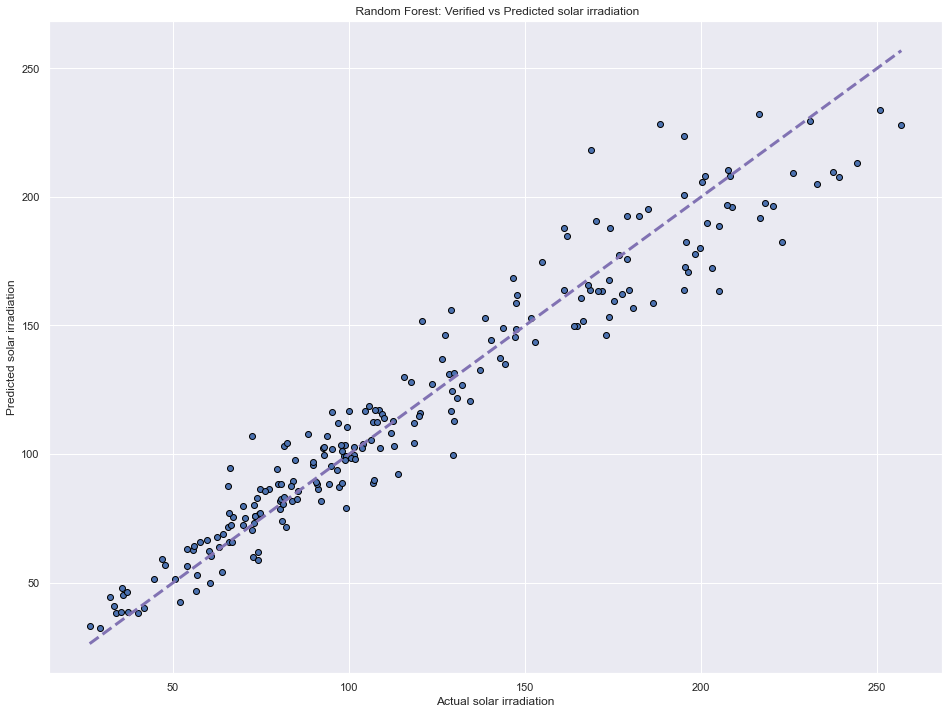

In [17]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_rfr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Random Forest: Verified vs Predicted solar irradiation")
plt.show()

C:\ProgramData\Anaconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


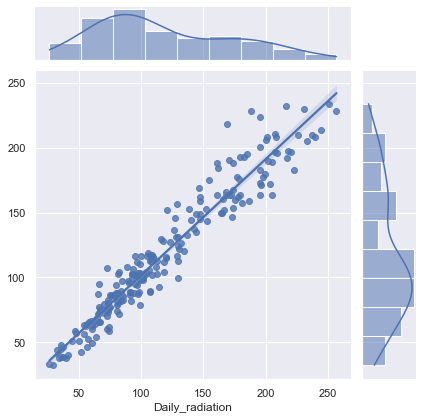

In [18]:
sns.jointplot(y_test, y_pred_rfr, kind='reg')
plt.show()

### GradientBoosting Regressor

In [19]:
# setup the pipeline steps: steps
steps = [('scaler', StandardScaler()), ('gbr', GradientBoostingRegressor())]

# create the pipeline: pipeline
pipeline_gbr = Pipeline(steps)

# fit the pipeline to the train set
pipeline_gbr.fit(X_train, y_train)

# predict the labels of the test set
y_pred_gbr = pipeline_gbr.predict(X_test)

In [20]:
# evaluating algorithm performance
mse_gr = mean_squared_error(y_test, y_pred_gbr, squared=False)

mae_gr = mean_absolute_error(y_test, y_pred_gbr)

print('r2_score', r2_score(y_test, y_pred_gbr))

print('Root Mean Squared Error: %.2f' % np.sqrt(mse_gr))

print('Root Mean Absolute Error: %.2f' % np.sqrt(mae_gr))

r2_score 0.9402714325075345
Root Mean Squared Error: 3.65
Root Mean Absolute Error: 3.17


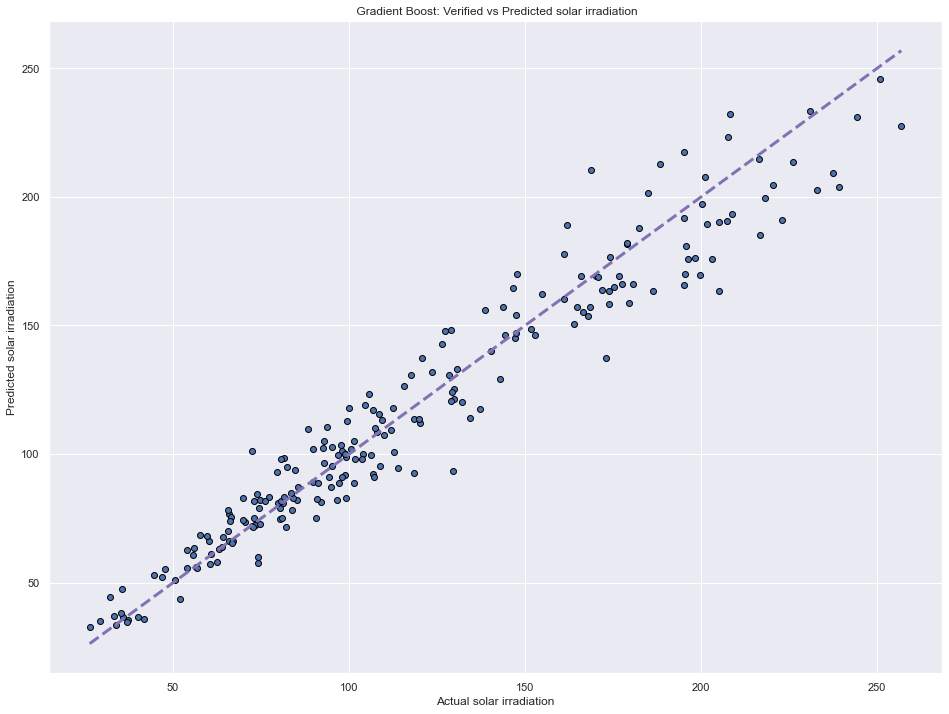

In [21]:
# run the model against the test data presented through a plot
fig, pX = plt.subplots()

pX.scatter(y_test, y_pred_gbr, edgecolors=(0, 0, 0))
pX.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'm--', lw=3)
pX.set_xlabel('Actual solar irradiation')
pX.set_ylabel('Predicted solar irradiation')
pX.set_title(" Gradient Boost: Verified vs Predicted solar irradiation")
plt.show()

C:\ProgramData\Anaconda3\envs\mlops\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


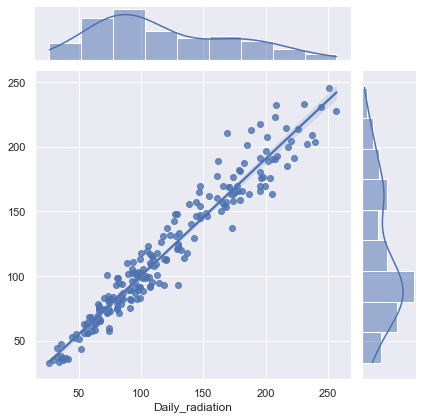

In [22]:
sns.jointplot(y_test, y_pred_gbr, kind='reg')
plt.show()

To summarize, out of the three algorithms, the `GradientBoosting Regressor` performed well with a `r2_score` of 89.92%. This is followed by `Random Forest Regressor` with a `r2_score` of 88.61%. Lastly, `Linear Regression` with a `r2_score` of 85.84%.